# Experimenting with Hamiltonian Cycles on Hypercubes


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['text.usetex'] = True

## First steps: finding a spatial embedding

I spent some time drawing hypercubes on dot-grid paper until I found a configuration I liked. One interesting property of this embedding is that group actions on the hypercube could be computed using modulo arithmetic in the two-dimensional embedded space. However, a more efficient method is simply to use the xor operator in the 4-dimensional representation.

In [10]:
# Set of w, x, y, and z actions, plus the null action
transforms = {
    0b0000 : np.array([0, 0]),
    0b1000 : np.array([7, 1]),
    0b0100 : np.array([1, -7]),
    0b0010 : np.array([1, 3]),
    0b0001 : np.array([3, -1])
}

# Apply transformation along each of four dimensions
# TODO: could be made more general to accept n-dimensional inputs
f = lambda x : np.sum(np.array([transforms[x & (1 << i)] for i in range(4)]), axis=0)

# Dictionary containing mappings from points to their embeddings
mappings = {x : f(x) for x in range(16)}

print(*mappings.items(), sep='\n')

(0, array([0, 0]))
(1, array([ 3, -1]))
(2, array([1, 3]))
(3, array([4, 2]))
(4, array([ 1, -7]))
(5, array([ 4, -8]))
(6, array([ 2, -4]))
(7, array([ 5, -5]))
(8, array([7, 1]))
(9, array([10,  0]))
(10, array([8, 4]))
(11, array([11,  3]))
(12, array([ 8, -6]))
(13, array([11, -7]))
(14, array([ 9, -3]))
(15, array([12, -4]))


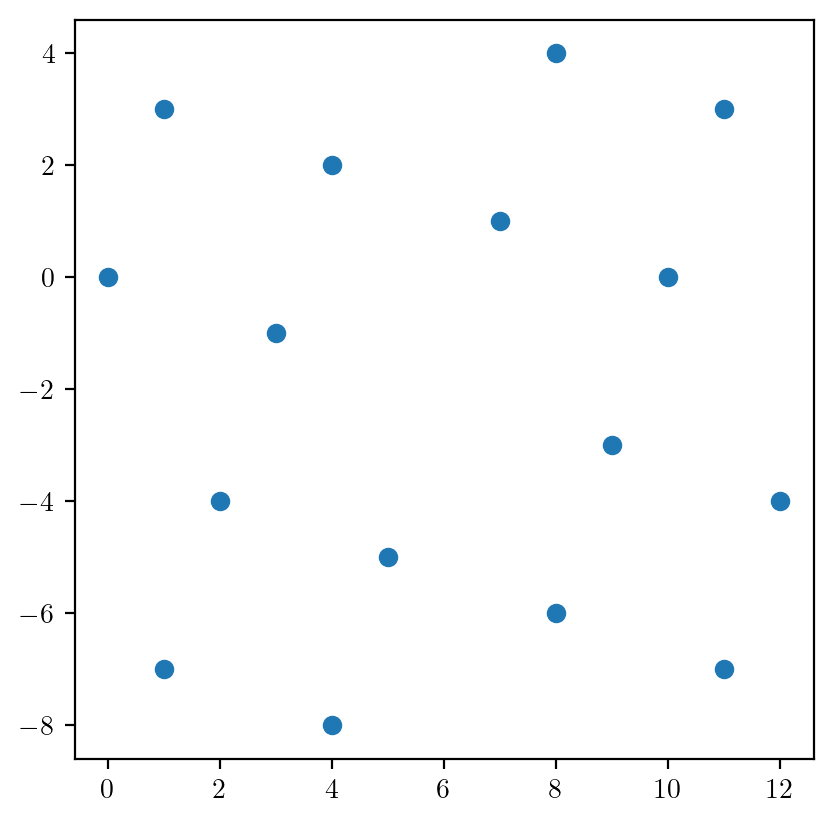

In [14]:
# Just the embeddings
point_coords = np.array([mappings[x] for x in mappings])

plt.scatter(*point_coords.T)
plt.axis('scaled')
plt.show()

## Shorthand notation for paths along the hypercube

For convenience's sake, it's nice to be able to represent paths using a string of actions, i.e., `yzyw` or `zyzx`.

In [3]:

# Lookup table from actions to their numeric representations, for convenience
actions = {
    'w' : 0b1000,
    'x' : 0b0100,
    'y' : 0b0010,
    'z' : 0b0001
}

# Converts a list of actions to a path in the embedded space
def path_to_coords(path, start):
    action_list = [start] + list(map(lambda i : actions[i], path))
    path_points = itertools.accumulate(action_list, operator.xor)
    return np.array([mappings[i] for i in path_points])

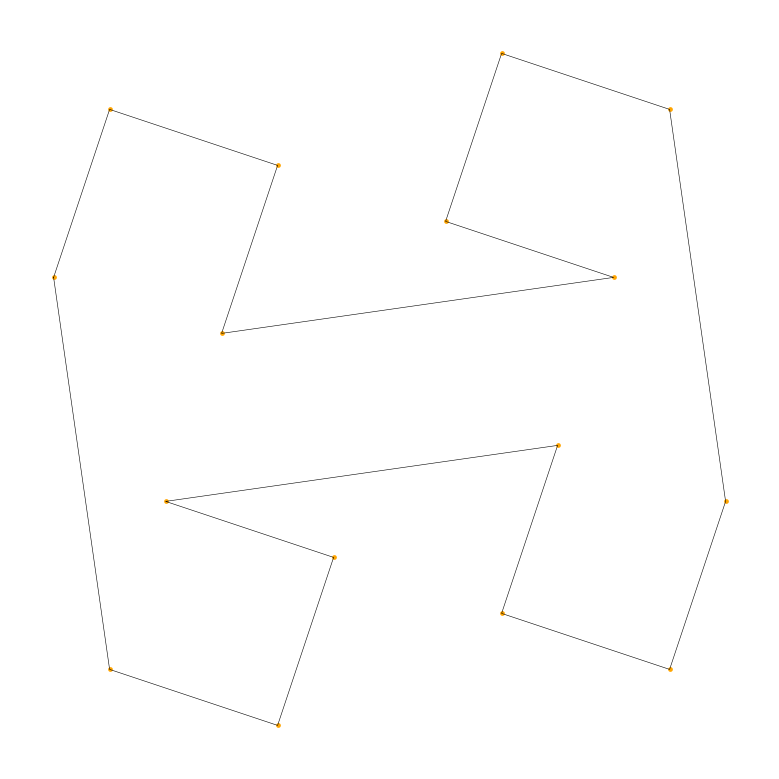

In [4]:
# Test expression forming a Hamiltonian cycle along the hypercube
pexp = 'yzywzyzxyzywzyzx'

plt.plot(*path_to_coords(pexp, 0).T, lw=.2, c='k')
plt.scatter(*point_coords.T, s=.5, c='orange')
plt.axis('scaled')
plt.axis('off')
plt.show()

## Cycling through different starting configurations

By starting at different points along the hypercube and applying the same set of actions, different cycles around the hypercube can be obtained. These are always proper Hamiltonian cycles, but may display different symmetries from the original path.

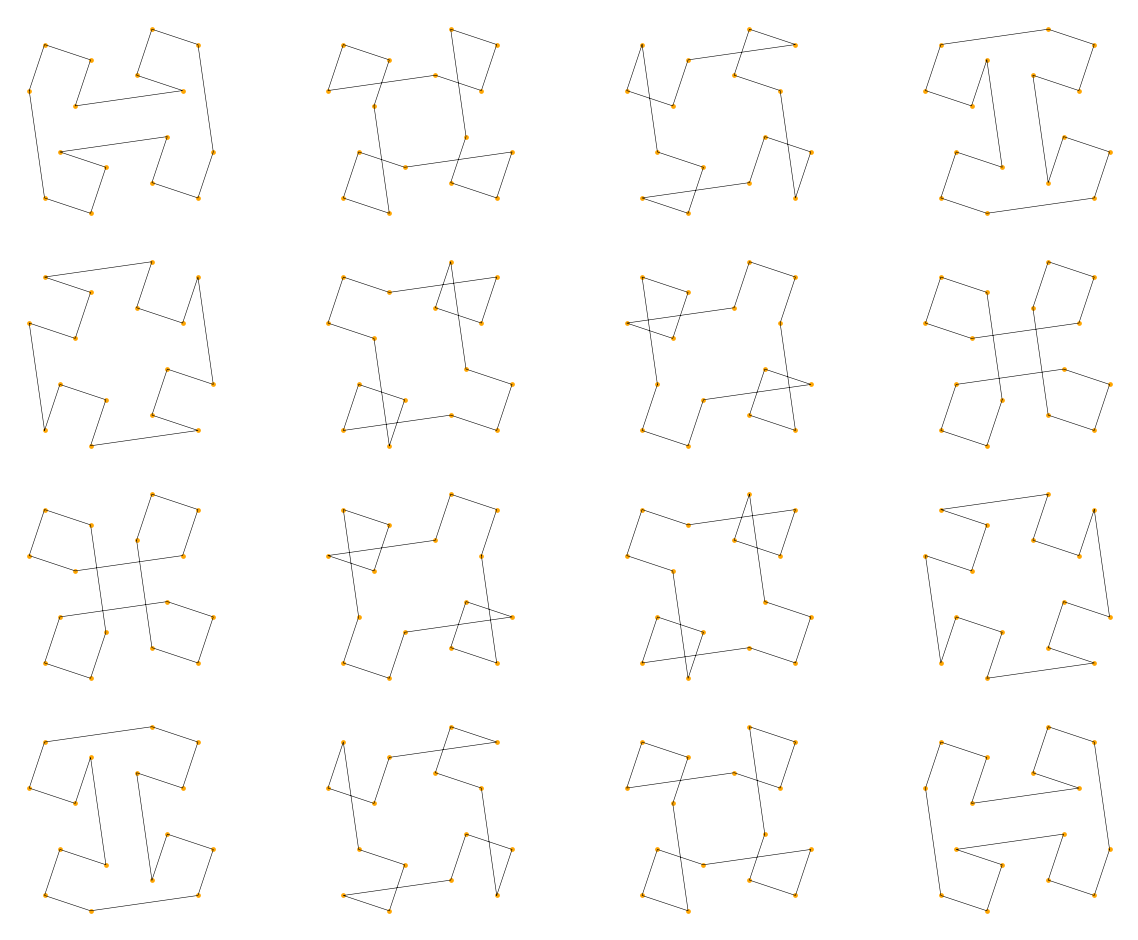

In [153]:
p1 = 'yzywzyzxyzywzyzx'

fig, axs = plt.subplots(4, 4)


for i in range(16):
    axs[i//4, i%4].plot(*path_to_coords(p1, i).T, lw=.2, c='k')
    axs[i//4, i%4].scatter(*point_coords.T, s=.5, c='orange')
    axs[i//4, i%4].axis('scaled')
    axs[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()

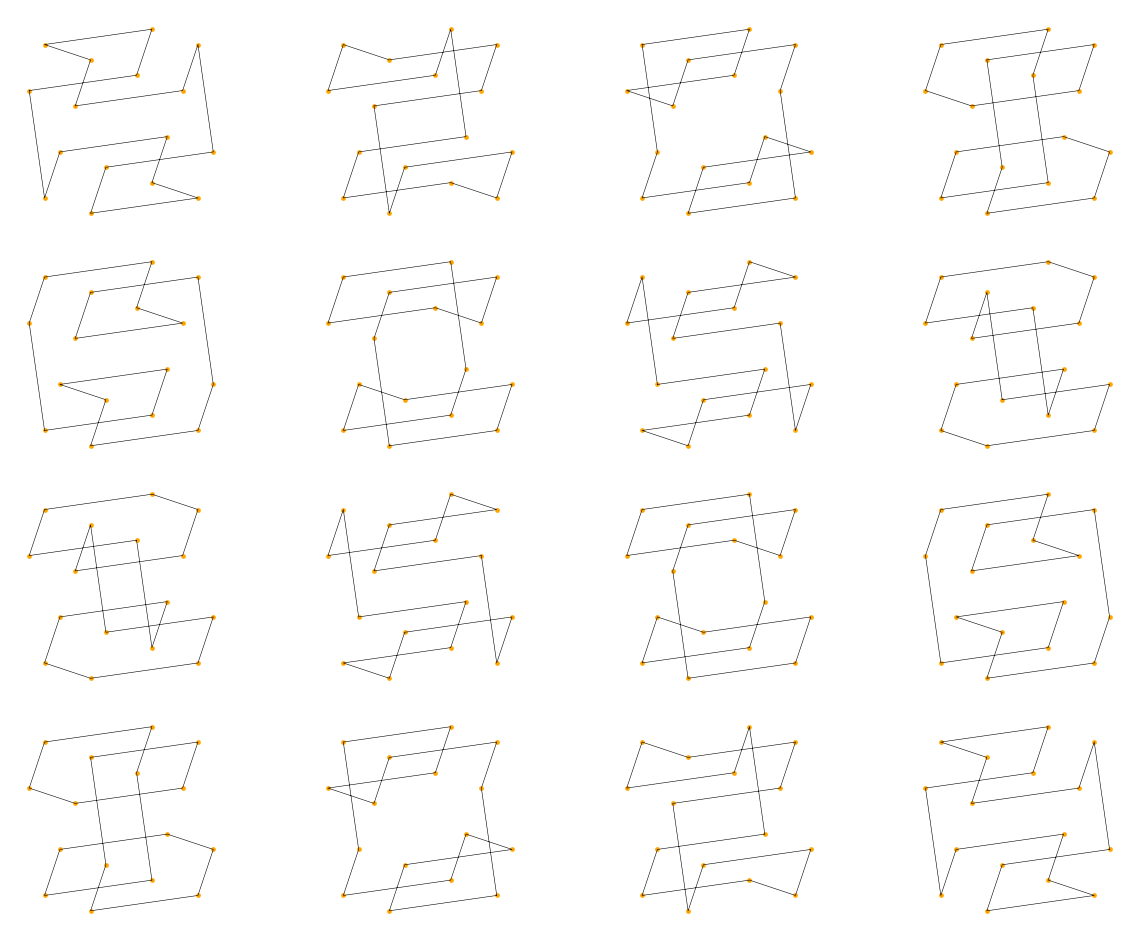

In [154]:
p2 = 'wywzywyxwywzywyx'

fig, axs = plt.subplots(4, 4)

for i in range(16):
    axs[i//4, i%4].plot(*path_to_coords(p2, i).T, lw=.2, c='k')
    axs[i//4, i%4].scatter(*point_coords.T, s=.5, c='orange')
    axs[i//4, i%4].axis('scaled')
    axs[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()

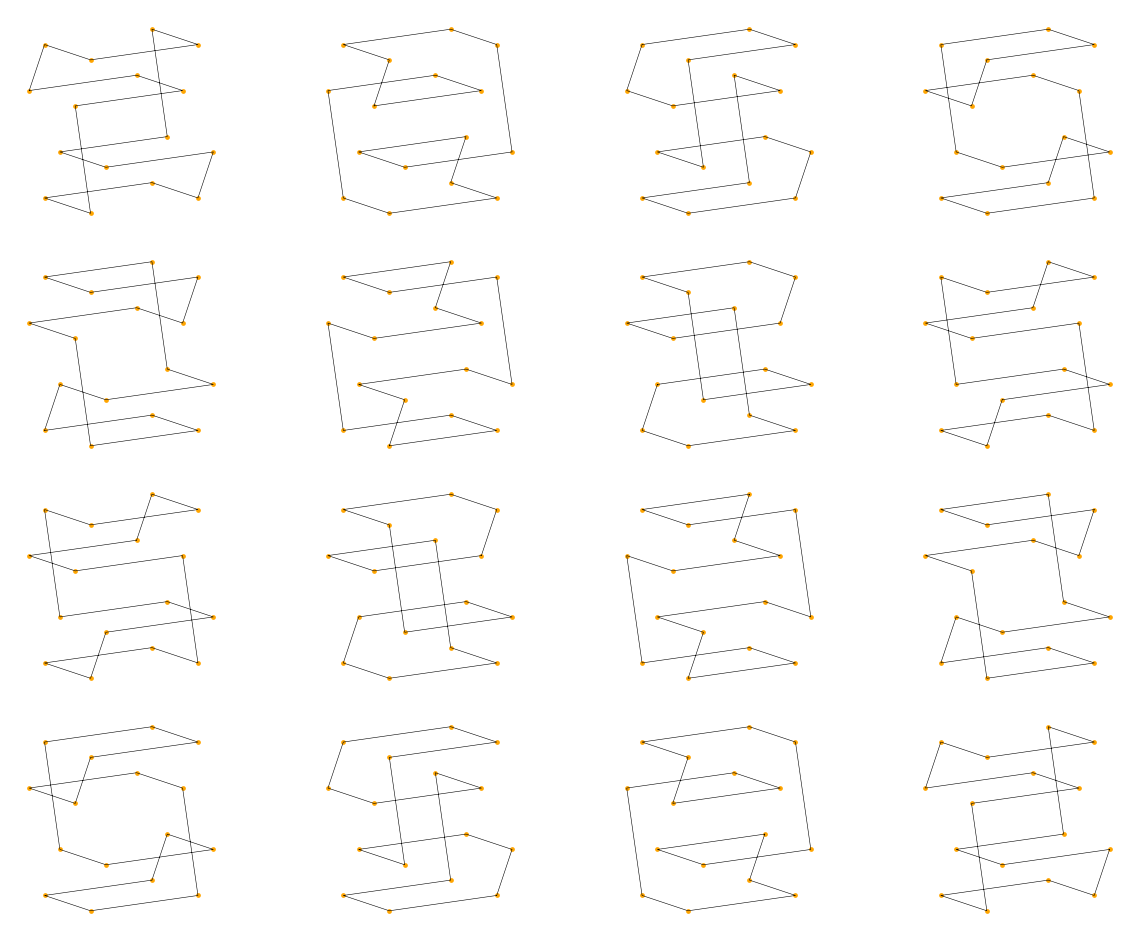

In [156]:
p2 = 'wzwxzwzywzwxzwzy'

fig, axs = plt.subplots(4, 4)

for i in range(16):
    axs[i//4, i%4].plot(*path_to_coords(p2, i).T, lw=.2, c='k')
    axs[i//4, i%4].scatter(*point_coords.T, s=.5, c='orange')
    axs[i//4, i%4].axis('scaled')
    axs[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()

## Applying substitutions

We can arbitrarily swap any two sets of actions in a cycle to obtain a new cycle. The following algorithm takes a string representing a permutation of the original axes `wxyz` (i.e., `zywx`) to obtain a new path.

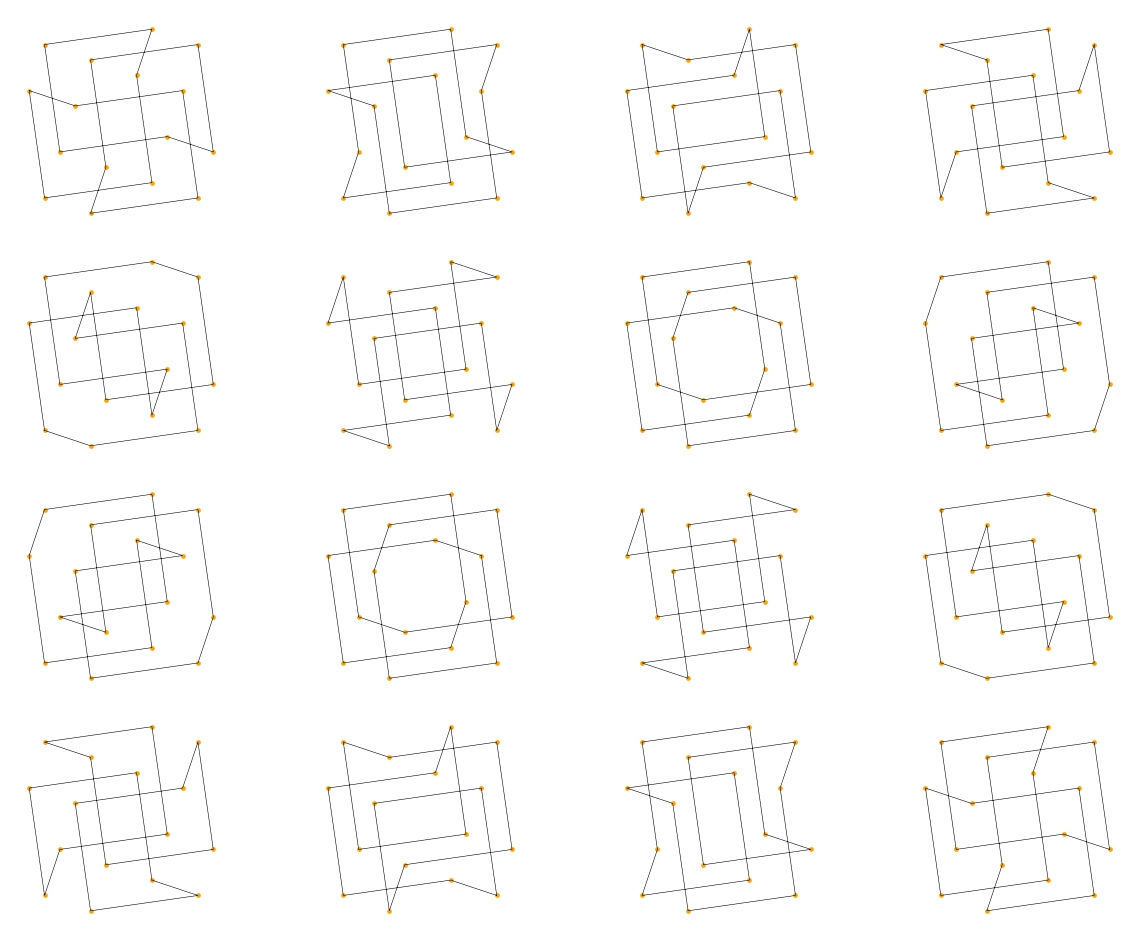

In [187]:
# path consists of arbitrary string of characters in [w-z]
# sub consists of same, length 4

def path_sub(path, sub):
    zs = zip(map(lambda a : ord(a) - ord('w'), sub), range(4))
    d = {chr(x + ord('w')) : chr(y + ord('w')) for x, y in zs}
    return ''.join(list(map(lambda x : d[x], path)))
    
p5 = path_sub(p1, 'zywx')

fig, axs = plt.subplots(4, 4)

for i in range(16):
    axs[i//4, i%4].plot(*path_to_coords(p5, i).T, lw=.2, c='k')
    axs[i//4, i%4].scatter(*point_coords.T, s=.5, c='orange')
    axs[i//4, i%4].axis('scaled')
    axs[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()

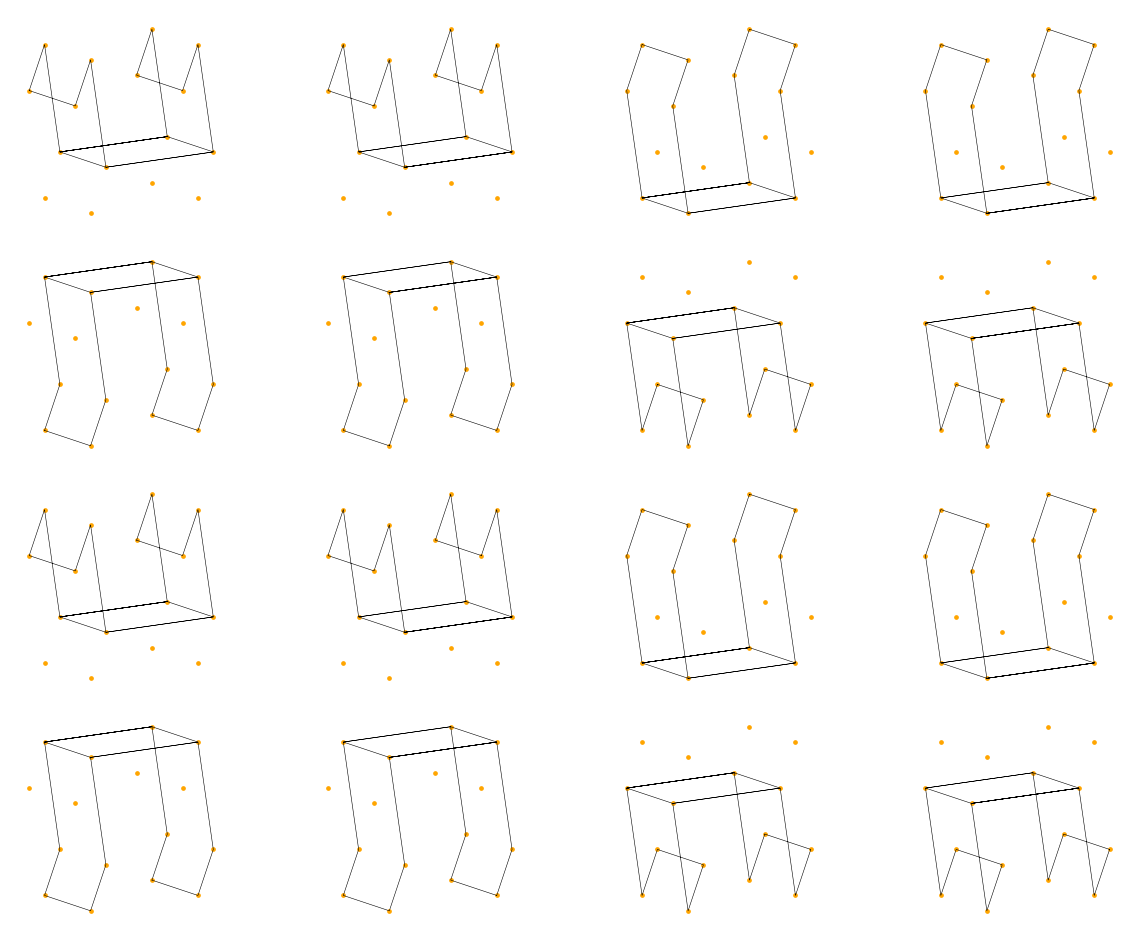

In [203]:
p4 = 'zyxwzwwxyzyxwzwwxy'
fig, axs = plt.subplots(4, 4)

for i in range(16):
    axs[i//4, i%4].plot(*path_to_coords(p4, i).T, lw=.2, c='k')
    axs[i//4, i%4].scatter(*point_coords.T, s=.5, c='orange')
    axs[i//4, i%4].axis('scaled')
    axs[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()